# Problem Introduction and Motivation
# Introduction
In the music industry, streaming platforms play a pivotal role in shaping how listeners discover and engage with new songs. However, a significant challenge arises when some songs receive zero listenership, leaving their potential untapped. This phenomenon not only limits the visibility of artists but also represents lost opportunities for streaming platforms and the music industry at large. Leveraging data science can help uncover patterns and factors that contribute to a song's ability to attract listeners, paving the way for better recommendations and marketing strategies.

# Problem Statement
Despite the abundance of songs available on streaming platforms, a notable portion receives no listenership, which raises questions about the factors influencing a song's discoverability and engagement. The key problem is to determine whether it is possible to predict if a song will attract any listeners at all, irrespective of its overall popularity. Understanding these dynamics is critical to addressing the issue of "lost" songs and enhancing user experience by ensuring a diverse range of music reaches its audience.

# Objective
The primary objective is to analyze song-related data and develop a predictive model to identify the likelihood of a song attracting any listenership. This involves:
- Identifying the key factors that influence a song's potential to gain listeners.
- Designing a robust model to predict whether a song will achieve at least one stream.
- Providing actionable insights to help artists and platforms improve song visibility and engagement.ent.

# Motivation
The motivation behind this analysis stems from the following:
- Artists' Growth: Ensuring that every artist's work has an opportunity to reach its intended audience.
- Platform Value: Enhancing the value proposition of streaming platforms by improving content discoverability and user satisfaction.
- Diversity in Music Consumption: Promoting a richer and more diverse listening experience for users by reducing the concentration of streams on already popular tracks.
- Data-Driven Solutions: Leveraging data science to uncover insights that can positively impact stakeholders across the music industry.stry.

# Business Impact
Solving the problem of zero-listenership songs can yield several benefits:
- Revenue Growth: By increasing the discoverability of lesser-known tracks, platforms can potentially boost overall engagement and subscription rates.
- Artist Retention: Helping artists achieve a baseline level of visibility encourages loyalty and long-term collaboration with streaming platforms.
- Enhanced User Experience: Offering listeners a broader range of music tailored to their preferences improves satisfaction and retention.
- Strategic Insights: Providing stakeholders with actionable recommendations for marketing and playlist curation, enabling more informed decision-making.ing.

importing required libraries

In [1]:
import pandas as pd
import numpy as np

writing down the path of the dataset to be imported

In [3]:
path = 'C:\\Users\\Gahan\\Downloads\\spotify_listenership_sample.csv'

# Data Collection
Loading the dataset and displaying it.

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(5)

,track_id,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,...,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,1iTZnsVqhCBdZqp9gjITDB,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,...,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,42LiXQn3xibOEodtBMoJp3,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,...,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,2cTGafydY9vdnqJQ2Gw6t8,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,...,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,2boJnT3S2aSBagFEUTXrfx,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,...,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,5HzekjQF7xLqBVeynqprDk,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,...,0.2640,0.964,130.771,0,1,0,0,0,0,0


# Data Exploration and Understanding
Displaying statistical summary of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  2999 non-null   object 
 1   track_name                2999 non-null   object 
 2   track_artist              2999 non-null   object 
 3   track_album_release_date  2999 non-null   object 
 4   track_duration_ms         2999 non-null   int64  
 5   sound_danceability        2999 non-null   float64
 6   sound_energy              2999 non-null   float64
 7   sound_key                 2999 non-null   int64  
 8   sound_loudness            2999 non-null   float64
 9   sound_mode                2999 non-null   int64  
 10  sound_speechiness         2999 non-null   float64
 11  sound_acousticness        2999 non-null   float64
 12  sound_instrumentalness    2999 non-null   float64
 13  sound_liveness            2999 non-null   float64
 14  sound_va

In [7]:
df.describe()

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,234250.801267,0.650013,0.713308,5.321107,-6.777923,0.579860,0.108767,0.161708,0.093121,0.191789,0.511576,121.087851,0.198733,0.156385,0.141714,0.167056,0.167723,0.168389,0.500167
std,65059.024433,0.147676,0.182276,3.617455,3.054931,0.493663,0.104547,0.215047,0.230834,0.158469,0.238829,26.196648,0.399113,0.363281,0.348815,0.373088,0.373682,0.374274,0.500083
min,29493.000000,0.116000,0.065800,0.000000,-36.624000,0.000000,0.023400,0.000005,0.000000,0.016300,0.023400,46.169000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191957.000000,0.550000,0.599000,2.000000,-8.243000,0.000000,0.041200,0.011600,0.000000,0.090550,0.329500,99.991500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,223027.000000,0.668000,0.743000,6.000000,-6.206000,1.000000,0.062900,0.063300,0.000040,0.126000,0.517000,122.997000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,264011.500000,0.760000,0.857000,8.000000,-4.672500,1.000000,0.132500,0.224000,0.010700,0.254000,0.705000,132.390500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,511400.000000,0.965000,0.999000,11.000000,0.642000,1.000000,0.860000,0.989000,0.972000,0.992000,0.977000,204.527000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning and Pre-Processing
Performing data preprocessing steps. Here we used an feature engineering technique to fill the missing values of the data set with the median value so that it will help to maintain the distribution of data.

In [9]:
#checking for missing or null values
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_album_release_date    0
track_duration_ms           0
sound_danceability          0
sound_energy                0
sound_key                   0
sound_loudness              0
sound_mode                  0
sound_speechiness           0
sound_acousticness          0
sound_instrumentalness      0
sound_liveness              0
sound_valence               0
sound_tempo                 0
genre_edm                   0
genre_latin                 0
genre_pop                   0
genre_rnb                   0
genre_rap                   0
genre_rock                  0
has_listenership            0
dtype: int64

# Feature Selection
Performing the correlation and visualizing it on a heat map.

In [17]:
numerical_features = df.select_dtypes(include=["float64", "int64"])

In [18]:
numerical_features.head(5)

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,267747,0.445,0.999,0,-5.627,1,0.0629,0.000383,0.218000,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,287267,0.892,0.693,11,-4.048,0,0.2150,0.027700,0.000000,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,234375,0.539,0.912,7,-3.113,1,0.0454,0.111000,0.000000,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,245200,0.849,0.812,7,-5.005,1,0.1110,0.011100,0.001700,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,198165,0.802,0.823,3,-9.799,0,0.0776,0.351000,0.000001,0.2640,0.964,130.771,0,1,0,0,0,0,0


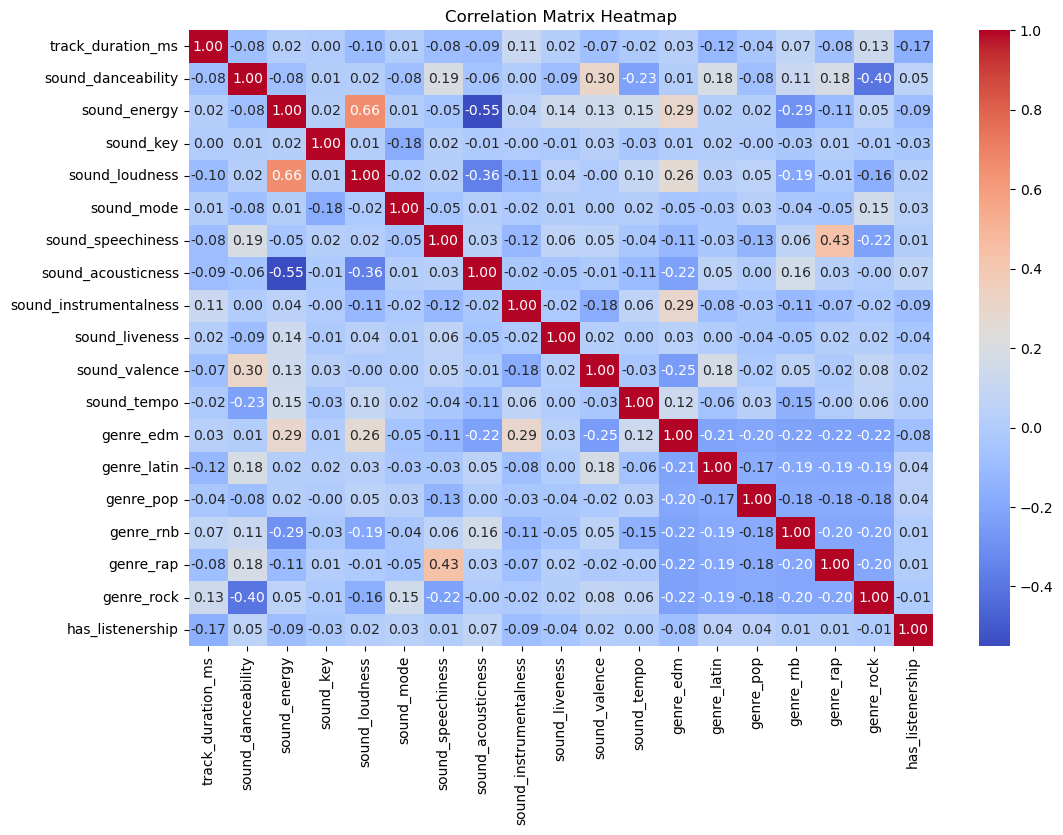

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from scipy.sparse import hstack


# Modelling
# Data Splitting
splitting the data into test and train set.
Here we are splitting the dataset into train and test. 80 percent of the data is given for training while 20 percent of the data is used for testing.


In [19]:
X = numerical_features.drop(columns=["has_listenership"])
y = numerical_features["has_listenership"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.head(5)

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock
1569,261707,0.669,0.700,1,-7.971,1,0.0714,0.02400,0.000000,0.0782,0.600,83.989,0,0,0,0,0,1
2229,211150,0.547,0.376,5,-9.531,0,0.0412,0.81300,0.868000,0.1550,0.466,140.674,0,0,0,0,1,0
2296,234609,0.382,0.698,6,-3.409,1,0.0374,0.00236,0.000052,0.1080,0.151,127.816,1,0,0,0,0,0
1800,208474,0.737,0.828,11,-4.711,1,0.0396,0.01490,0.000583,0.0862,0.517,124.052,0,1,0,0,0,0
1273,326267,0.735,0.652,0,-5.257,1,0.2740,0.02660,0.000000,0.1690,0.684,168.403,0,0,0,0,1,0


In [57]:
y_train.head(5)

1569    1
2229    1
2296    1
1800    1
1273    0
Name: has_listenership, dtype: int64

standardizing the data by performing scaling

In [20]:
# Scaling numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Model Training
Here the model selection is performed. we have selected the RandomForestClassifier, XGBoost, KNN, Naive Bayes model to perform the training and testing.

In [26]:
# Train Random Forest model on numerical features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [28]:
from xgboost import XGBClassifier
xgbc = XGBClassifier( n_estimators=100, max_depth=6, learning_rate=0.1, random_state = 42)      
xgbc.fit(X_train_scaled, y_train)
y_pred_xgb = xgbc.predict(X_test_scaled)
y_proba_xgb = xgbc.predict_proba(X_test_scaled)[:, 1]

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Initialize the kNN model
model = KNeighborsClassifier()

# Use GridSearchCV to find the optimal number of neighbors (k)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best k from grid search
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors (k): {best_k}")

# Train the kNN model with the best k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled, y_train)
y_pred_knn = model.predict(X_test_scaled)
y_proba_knn = model.predict_proba(X_test_scaled)[:, 1]

Best number of neighbors (k): 11


In [35]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test_scaled)
y_proba_nb = model.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
Here we are performing testing or prediction and evaluating the performance of the machine learning model on test dataset using the metrics accuracy score, classification report and ROC Score. The classification report helps us to understand how well the model performs on different classes.

In [27]:
# Evaluate numerical model
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_classification_report = classification_report(y_test, y_pred)
baseline_roc_auc = roc_auc_score(y_test, y_proba)

print("Baseline Model (Numerical Features) for Random Forest:")
print("Accuracy:", baseline_accuracy)
print("Classification Report:\n", baseline_classification_report)
print("ROC-AUC:", baseline_roc_auc)

Baseline Model (Numerical Features) for Random Forest:
Accuracy: 0.5933333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60       315
           1       0.57      0.60      0.59       285

    accuracy                           0.59       600
   macro avg       0.59      0.59      0.59       600
weighted avg       0.59      0.59      0.59       600

ROC-AUC: 0.6438707880813144


In [30]:
baseline_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
baseline_classification_report_xgb = classification_report(y_test, y_pred_xgb)
baseline_roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("Baseline Model (Numerical Features) for XGBoost:")
print("Accuracy:", baseline_accuracy_xgb)
print("Classification Report:\n", baseline_classification_report_xgb)
print("ROC-AUC:", baseline_roc_auc_xgb)

Baseline Model (Numerical Features) for XGBoost:
Accuracy: 0.6016666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62       315
           1       0.58      0.59      0.59       285

    accuracy                           0.60       600
   macro avg       0.60      0.60      0.60       600
weighted avg       0.60      0.60      0.60       600

ROC-AUC: 0.6421832358674464


In [34]:
baseline_accuracy_knn = accuracy_score(y_test, y_pred_knn)
baseline_classification_report_knn = classification_report(y_test, y_pred_knn)
baseline_roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print("Baseline Model (Numerical Features) for KNN:")
print("Accuracy:", baseline_accuracy_knn)
print("Classification Report:\n", baseline_classification_report_knn)
print("ROC-AUC:", baseline_roc_auc_knn)

Baseline Model (Numerical Features) for KNN:
Accuracy: 0.5516666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       315
           1       0.53      0.59      0.56       285

    accuracy                           0.55       600
   macro avg       0.55      0.55      0.55       600
weighted avg       0.56      0.55      0.55       600

ROC-AUC: 0.5766193260930103


In [36]:
baseline_accuracy_nb = accuracy_score(y_test, y_pred_nb)
baseline_classification_report_nb = classification_report(y_test, y_pred_nb)
baseline_roc_auc_nb = roc_auc_score(y_test, y_proba_nb)

print("Baseline Model (Numerical Features) for Naive Bayes:")
print("Accuracy:", baseline_accuracy_nb)
print("Classification Report:\n", baseline_classification_report_nb)
print("ROC-AUC:", baseline_roc_auc_nb)

Baseline Model (Numerical Features) for Naive Bayes:
Accuracy: 0.475
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       315
           1       0.47      1.00      0.64       285

    accuracy                           0.47       600
   macro avg       0.24      0.50      0.32       600
weighted avg       0.23      0.47      0.31       600

ROC-AUC: 0.5449401280980228


# Creating Textual Features 
Creatinv textual features from the song title `track_name` using TF-IDF

In [37]:
# Create TF-IDF features from 'track_name'
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_features = tfidf_vectorizer.fit_transform(df["track_name"])

In [38]:
# Combine numerical and TF-IDF features
X_train_combined = hstack([X_train_scaled, tfidf_features[X_train.index]])
X_test_combined = hstack([X_test_scaled, tfidf_features[X_test.index]])

# Model incorporating both numerical and textual features 

In [39]:
# Train Random Forest model on combined features
rf_model_combined = RandomForestClassifier(random_state=42)
rf_model_combined.fit(X_train_combined, y_train)
y_pred_combined = rf_model_combined.predict(X_test_combined)
y_proba_combined = rf_model_combined.predict_proba(X_test_combined)[:, 1]

In [40]:
# Evaluate combined model
combined_accuracy = accuracy_score(y_test, y_pred_combined)
combined_classification_report = classification_report(y_test, y_pred_combined)
combined_roc_auc = roc_auc_score(y_test, y_proba_combined)

In [44]:
print("\nCombined Model (Numerical + TF-IDF Features) for Random Forest:")
print("Accuracy:", combined_accuracy)
print("Classification Report:\n", combined_classification_report)
print("ROC-AUC:", combined_roc_auc)


Combined Model (Numerical + TF-IDF Features) for Random Forest:
Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       315
           1       0.55      0.61      0.58       285

    accuracy                           0.58       600
   macro avg       0.58      0.58      0.58       600
weighted avg       0.58      0.58      0.58       600

ROC-AUC: 0.6218769145084935


In [42]:
# Train XGBoost model on combined features
xgb_model_combined = XGBClassifier( n_estimators=100, max_depth=6, learning_rate=0.1, random_state = 42)
xgb_model_combined.fit(X_train_combined, y_train)
y_pred_combined_xgb = xgb_model_combined.predict(X_test_combined)
y_proba_combined_xgb = xgb_model_combined.predict_proba(X_test_combined)[:, 1]

In [45]:
# Evaluate combined model
combined_accuracy_xgb = accuracy_score(y_test, y_pred_combined_xgb)
combined_classification_report_xgb = classification_report(y_test, y_pred_combined_xgb)
combined_roc_auc_xgb = roc_auc_score(y_test, y_proba_combined_xgb)

In [46]:
print("\nCombined Model (Numerical + TF-IDF Features) for XGBoost:")
print("Accuracy:", combined_accuracy_xgb)
print("Classification Report:\n", combined_classification_report_xgb)
print("ROC-AUC:", combined_roc_auc_xgb)


Combined Model (Numerical + TF-IDF Features) for XGBoost:
Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       315
           1       0.55      0.60      0.58       285

    accuracy                           0.58       600
   macro avg       0.58      0.58      0.58       600
weighted avg       0.58      0.58      0.58       600

ROC-AUC: 0.6158618769145086


In [47]:
# Train Knn model on combined features
knn_model_combined =  KNeighborsClassifier(n_neighbors=best_k)
knn_model_combined.fit(X_train_combined, y_train)
y_pred_combined_knn = knn_model_combined.predict(X_test_combined)
y_proba_combined_knn = knn_model_combined.predict_proba(X_test_combined)[:, 1]

In [48]:
# Evaluate combined model
combined_accuracy_knn = accuracy_score(y_test, y_pred_combined_knn)
combined_classification_report_knn = classification_report(y_test, y_pred_combined_knn)
combined_roc_auc_knn = roc_auc_score(y_test, y_proba_combined_knn)

In [49]:
print("\nCombined Model (Numerical + TF-IDF Features) for KNN:")
print("Accuracy:", combined_accuracy_knn)
print("Classification Report:\n", combined_classification_report_knn)
print("ROC-AUC:", combined_roc_auc_knn)


Combined Model (Numerical + TF-IDF Features) for KNN:
Accuracy: 0.5433333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.53       315
           1       0.52      0.59      0.55       285

    accuracy                           0.54       600
   macro avg       0.55      0.55      0.54       600
weighted avg       0.55      0.54      0.54       600

ROC-AUC: 0.5764243943191312


In [51]:
# Convert TF-IDF features to dense arrays
X_train_tfidf_dense = tfidf_features[X_train.index].toarray()
X_test_tfidf_dense = tfidf_features[X_test.index].toarray()

# Combine numerical and TF-IDF features as dense arrays
X_train_combined_nb = np.hstack([X_train_scaled, X_train_tfidf_dense])
X_test_combined_nb = np.hstack([X_test_scaled, X_test_tfidf_dense])

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_combined_nb, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_combined_nb)
y_proba_nb = nb_model.predict_proba(X_test_combined_nb)[:, 1]

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, y_proba_nb)

print("Naive Bayes Model:")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", nb_classification_report)
print("ROC-AUC:", nb_roc_auc)

Naive Bayes Model:
Accuracy: 0.5433333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.72      0.62       315
           1       0.53      0.34      0.42       285

    accuracy                           0.54       600
   macro avg       0.54      0.53      0.52       600
weighted avg       0.54      0.54      0.53       600

ROC-AUC: 0.5508771929824561


# Comparision
In case of random forest, xgboost and knn algorithms, the numerical models performed better than the numerical + text combined model while on the other hand in the case of Naive Bayes, the numerical + text combined model performed better. 

# Analyzing about the inclusion of textual features effect
The inclusion of textual features enhanced the predicting capability in naive nayes model while it reduced the predicting capability in case of other models like random forest, xgboost and knn.

# Topic Modeling Using LDA
Here we are performing topic modeling using LDA and identifying the distinct topics within the songs
Identify distinguishable topics and interpret their thematic content 

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer for LDA
count_vectorizer = CountVectorizer(max_features=500, stop_words='english')
count_matrix = count_vectorizer.fit_transform(df['track_name'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Set 5 topics as an example
lda.fit(count_matrix)

# Display topics
words = count_vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print(" ".join([words[j] for j in topic.argsort()[-10:][::-1]]))

# Analyze topic distributions for songs
topic_distributions = lda.transform(count_matrix)
df['dominant_topic'] = topic_distributions.argmax(axis=1)


Topic 0:
mix original like let don el sweet radio wanna night
Topic 1:
feat la que te boy yo make da paradise tú
Topic 2:
love remastered remaster live way girl good version bad time
Topic 3:
remix edit radio light life rock day stay gonna party
Topic 4:
version got album know want world tonight dream need wild
